参考文档：
https://langchain-ai.github.io/langgraph/agents/overview/


#使用 LangGraph 进行代理开发

LangGraph 提供低级原语和高级预构建组件，用于构建基于代理的应用程序。本节重点介绍预构建的可重用组件，这些组件旨在帮助您快速可靠地构建代理系统，而无需从头开始实施编排、内存或人工反馈处理。

#本章节介绍与构建的代理的组件：

#主要特点：
LangGraph 包含构建健壮的、生产就绪的代理系统所必需的几项功能：

内存集成：对短期 （基于会话） 和长期 （跨会话持久） 内存的原生支持，从而在聊天机器人和助手中实现有状态行为。
人机协同控制：执行可以无限期暂停以等待人工反馈，这与仅限于实时交互的基于 websocket 的解决方案不同。这样可以在工作流中的任何时间点进行异步审批、更正或干预。
流式处理支持：代理状态、模型令牌、工具输出或组合流的实时流式处理。
部署工具：包括无需基础设施的部署工具。LangGraph Platform 支持测试、调试和部署。
Studio：用于检查和调试工作流的可视化 IDE。
支持多种生产部署选项。




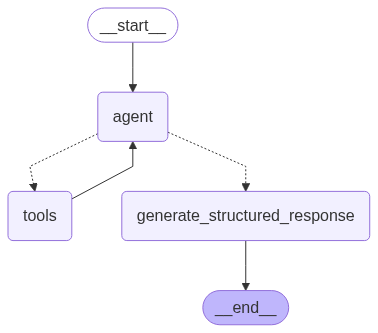

In [4]:
from langgraph.prebuilt import create_react_agent
from langchain_openai import ChatOpenAI
from pydantic import BaseModel

import os
from langchain.chat_models import init_chat_model

API_KEY = "sk-123"

BASE_URL = "https://api.deepseek.com"

os.environ["OPENAI_API_KEY"] = API_KEY
os.environ["OPENAI_API_BASE"] = BASE_URL


llm = init_chat_model("openai:deepseek-chat")




def tool() -> None:
    """Testing tool."""
    print("tool")



class ResponseFormat(BaseModel):
    """Response format for the agent."""
    result: str

agent = create_react_agent(
    llm,
    tools=[tool],
   
    response_format=ResponseFormat,
)

from IPython.display import Image, display

try:
    display(Image(agent.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass
